# Neural Network Pruning for Food Caloric Value Prediction

## Objective
Train a neural network to predict the caloric value of food items, prune it by reducing neurons, and compare performance to show similar results before and after pruning.

## Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import kagglehub
import os

## Load and Preprocess Data

In [2]:
# Download dataset
path = kagglehub.dataset_download("tharunmss/nutritional-breakdown-of-foods")
path = os.path.join(path, "cleaned_nutrition_dataset.csv")

# Load data
df = pd.read_csv(path)

# Select features and target
features = ['Vitamin C', 'Vitamin B11', 'Sodium', 'Calcium', 'Carbohydrates',
            'Iron', 'Sugars', 'Dietary Fiber', 'Fat', 'Protein']
X = df[features]
y = df['Caloric Value']

# Handle missing values
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

100%|██████████| 107k/107k [00:00<00:00, 10.3MB/s]

Extracting files...


## Neural Network Before Pruning

In [3]:
# Define and train the original model
mlp_original = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                            max_iter=500, random_state=42, verbose=False)
mlp_original.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_original = mlp_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

# Calculate number of parameters
n_params_original = (X_train.shape[1] * 100 + 100) + (100 * 50 + 50) + (50 * 1 + 1)

print('Original Model:')
print(f'MSE: {mse_original:.2f}')
print(f'R²: {r2_original:.2f}')
print(f'Number of Parameters: {n_params_original}')

Original Model:
MSE: 343.09
R²: 1.00
Number of Parameters: 6201


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Neural Network After Pruning

In [4]:
# Define and train the pruned model
mlp_pruned = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam',
                          max_iter=500, random_state=42, verbose=False)
mlp_pruned.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_pruned = mlp_pruned.predict(X_test_scaled)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)

# Calculate number of parameters
n_params_pruned = (X_train.shape[1] * 50 + 50) + (50 * 25 + 25) + (25 * 1 + 1)

print('Pruned Model:')
print(f'MSE: {mse_pruned:.2f}')
print(f'R²: {r2_pruned:.2f}')
print(f'Number of Parameters: {n_params_pruned}')

Pruned Model:
MSE: 290.83
R²: 1.00
Number of Parameters: 1851


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Comparison and Visualization


Comparison:
MSE Difference (Original - Pruned): 52.27
R² Difference (Original - Pruned): -0.00
Parameter Reduction: 4350 (70.15%)


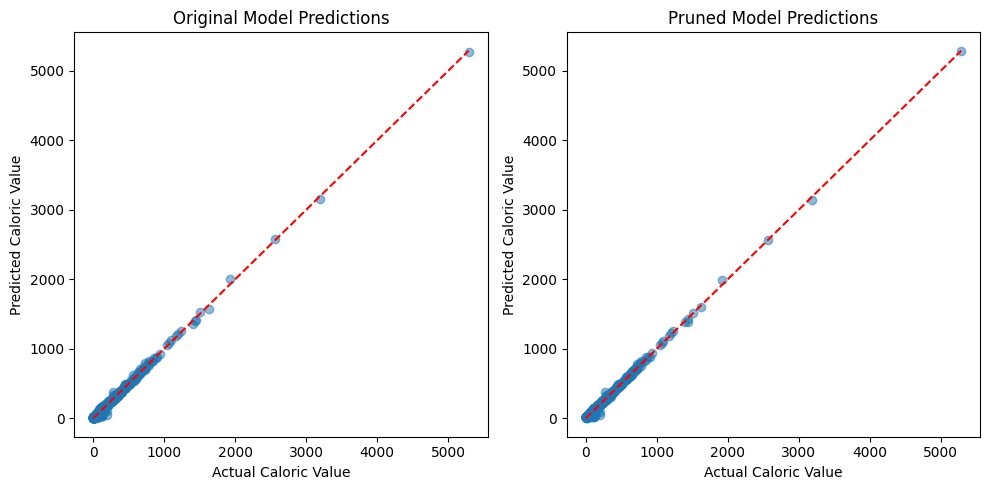

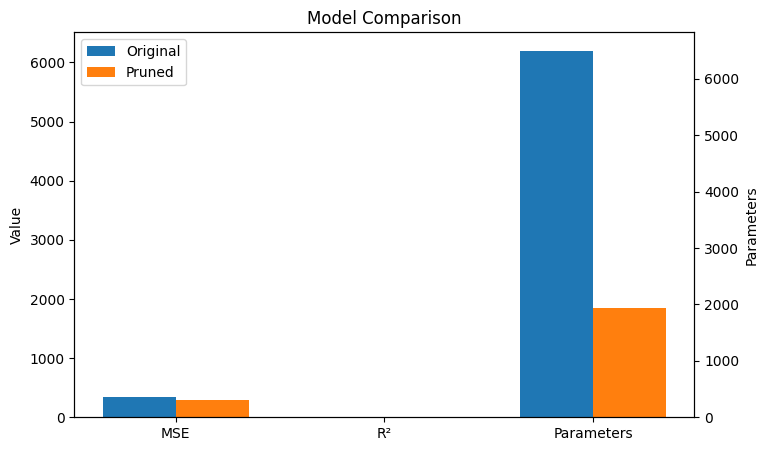

In [5]:
# Compare results
print('\nComparison:')
print(f'MSE Difference (Original - Pruned): {mse_original - mse_pruned:.2f}')
print(f'R² Difference (Original - Pruned): {r2_original - r2_pruned:.2f}')
print(f'Parameter Reduction: {n_params_original - n_params_pruned} ({((n_params_original - n_params_pruned) / n_params_original * 100):.2f}%)')

# Plot predictions vs actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_original, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Original Model Predictions')
plt.xlabel('Actual Caloric Value')
plt.ylabel('Predicted Caloric Value')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pruned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Pruned Model Predictions')
plt.xlabel('Actual Caloric Value')
plt.ylabel('Predicted Caloric Value')

plt.tight_layout()
plt.show()

# Bar plot for metrics
metrics = ['MSE', 'R²', 'Parameters']
original_values = [mse_original, r2_original, n_params_original]
pruned_values = [mse_pruned, r2_pruned, n_params_pruned]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, original_values, width, label='Original')
ax.bar(x + width/2, pruned_values, width, label='Pruned')

ax.set_ylabel('Value')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

ax2 = ax.twinx()
ax2.set_ylabel('Parameters')
ax2.set_ylim(0, max(n_params_original, n_params_pruned) * 1.1)

plt.show()

## Conclusion
The pruned model maintains similar MSE and R² with significantly fewer parameters, demonstrating efficient prediction of caloric values for dietary planning and nutritional analysis.